In [1]:
#@title mounting google drive
#mount goolge drive
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)


Mounted at /content/gdrive/


In [3]:
#@title changing directory
#get current directory and change it to where the data is stored
!pwd
%cd /content/gdrive/MyDrive/Spring 2024 Classes/PHYS 380 S24/Muon Data


/content/gdrive/MyDrive/Spring 2024 Classes/PHYS 380 S24/Notebooks
/content/gdrive/MyDrive/Spring 2024 Classes/PHYS 380 S24/Muon Data


In [4]:
#@title importing packages
# import packages
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import leastsq
import scipy as sc



In [48]:
#@title importing data file
# imports data
data=np.loadtxt("muon.data", dtype=float, delimiter=' ') #put your file here
#d1=np.loadtxt("Aidan's Muon Data.data", dtype=float, delimiter=' ')
data=np.loadtxt("24-03-28-18-00.data", dtype=float, delimiter=' ')
data=np.loadtxt("24-03-24-14-26.data", dtype=float, delimiter=' ')
d3=np.loadtxt("24-03-27-20-12.data", dtype=float, delimiter=' ')
d4=np.loadtxt("muon.data", dtype=float, delimiter=' ')

# first value is 40000 if nothing was detected, >40000 if one pulse was measured, less than 40000 if two pulses within 20 micorseconds occurred
# the second value is the unix time

In [49]:
#@title ave time
# calculates the total time that the experiment ran
duration = data[-1,1]-data[0,1]
print('The duration of this experiment was: %.3f h' %(duration/3600))

# calculates the average time between  events
data2 = np.copy(data)
data2=data2[:,0]

data2 = data2-40000
data2 = data2[data2[:]>0]
counts = np.sum(data2)
data = data[:,0]
data = data[data[:]<40000]

ave_time = duration/counts
print('The average time between events was: %.8f seconds'%ave_time )
data = data/1000

The duration of this experiment was: 0.051 h
The average time between events was: 0.00978600 seconds


In [10]:
#@title only run this when you want to combine class data
data = np.concatenate((d1,d2,d3,d4),axis=0)
data = data[:,0]
data = data[data[:]<40000]
data = data/1000 #puts time in units of microseconds

In [50]:
#@title Bin size
#Calculates a reasonable number of bins for the data set

timebin = .5 #number of microseconds
n = math.ceil((np.max(data) - np.min(data))/timebin)
print('The number of bins is:',n)
w = np.max(data)/n
print('The time range of each bin is: %.5f microseconds'%w)

The number of bins is: 39
The time range of each bin is: 0.50051 microseconds


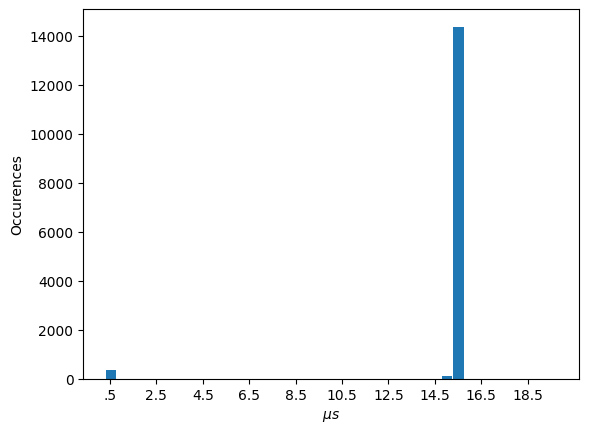

In [51]:
#@title create histogram
# this creates a histogram with the bins centered around the time range they represent
ydata, xdata =np.histogram(data, bins = n)
center = (xdata[:-1] + xdata[1:]) / 2
bins = ['.5', '2.5', '4.5', '6.5', '8.5', '10.5', '12.5','14.5', '16.5', '18.5']
plt.xticks(np.arange(0, 20, step=2)+.25, bins)  # Set label locations.
from matplotlib.ticker import StrMethodFormatter
plt.hist(data, bins = n, density = False, rwidth=.9)
plt.xlabel( '$\mu s$')
plt.ylabel('Occurences')
plt.show()


In [ ]:
#@title save histogram
plt.rcParams.update({'font.size': 16})
bins = ['1', '3', '5', '7', '9', '11', '13','15', '17', '19']
plt.xticks(np.arange(0, 20, step=2)+.75, bins)  # Set label locations.
plt.hist(data, bins = n, density = False, rwidth=.9)
plt.autoscale()

plt.xlabel( '$\mu s$')
plt.ylabel('Occurences')
plt.savefig('histogram.png',bbox_inches='tight')
plt.show()


The value of the mean life is: 2.605
The error in the mean life is:0.0022


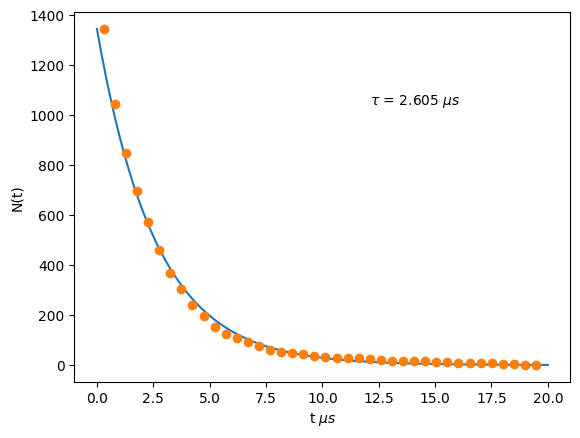

In [47]:
#@title Fit parameters and plotting data and model
#Here we fit our data to our model
N0 = np.sum(ydata)
ydata2 = [N0]
#sum tracks the remaining number of muons
for i in range(0,len(ydata)-1):
    sum = ydata2[i]-ydata[i]
    ydata2.append(sum)


#Put the function you want to fit your data to here.
def model(t,tau):
    return N0*np.exp(-t/tau)

# optimize constants for the model, p0 is the initial value
fits, fits_error= sc.optimize.curve_fit(model,center[0:len(ydata2)], ydata2,p0=[2.2])
print('The value of the mean life is: %.3f' %fits[0])
print('The error in the mean life is:%.4f' %fits_error[0,0])

#plotting the data and the model
times=np.linspace(0,20,100)
plt.plot(times,model(times,fits[0]))
plt.plot(center[0:len(ydata2)],ydata2,'o')
plt.text(times[-40],ydata2[1],'$\\tau$ = %.3f $\mu s$'%fits[0])
plt.xlabel( 't $\mu s$')
plt.ylabel('N(t)')
plt.show()


In [ ]:
#@title Save Histogram
plt.rcParams.update({'font.size': 16})
plt.plot(times,model(times,fits[0]))
plt.plot(center,ydata2,'o')
plt.text(times[-40],ydata2[1],'$\\tau$ = %.3f $\mu s$'%fits[0])
plt.xlabel( 't $(\mu s)$')
plt.ylabel('N(t)')
plt.autoscale()
plt.savefig('Decay fit.png',bbox_inches='tight')
plt.show()

In [26]:
print(ydata)

[1235  925  763  629  472  415  289  254  210  160  123   97   80   67
   65   36   42   28   29   18   15   11   20    8   11    9    9    7
    5    8   11    5    6    7    5    7    4    9    5    6]


In [38]:
print(center)

[ 0.30575  0.79725  1.28875  1.78025  2.27175  2.76325  3.25475  3.74625
  4.23775  4.72925  5.22075  5.71225  6.20375  6.69525  7.18675  7.67825
  8.16975  8.66125  9.15275  9.64425 10.13575 10.62725 11.11875 11.61025
 12.10175 12.59325 13.08475 13.57625 14.06775 14.55925 15.05075 15.54225
 16.03375 16.52525 17.01675 17.50825 17.99975 18.49125 18.98275 19.47425]
